<a href="https://colab.research.google.com/github/jonathan-pap/Data-Analyst-Udacity/blob/main/ford_go_bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Share
## Investigation
Bike sharing seem to be growing in within the cities,  the program allows for the rental of bikes for short periods of time.  Would like to unndertand the user audience and is the system being used.

## Data collection
Ford GoBike Data: https://s3.amazonaws.com/fordgobike-data/index.html

Once the data was collected the zip files were are stored in one directory for ease of access.

### The Data
Each trip is anonymized and includes:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- Member birth year
- Member Gender
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Bike_share_for_all_trip - which tracks members who are enrolled in the Bike Share for All program for low-income residents.


### What is/are the main feature(s) of interest in your dataset?

Is there a prefered time frame for example during daily commutes, and is there more rentals on particluar days, and what is the duration of renting a bike.

Does time of year have more bike rentals is there seasonal impact to the above or does being a member or subscriber have influeance on the rental.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
date time or the rental would be a key variable as we we can slice the date and times and further seperate on month, week, day, and hour of renteal.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import fnmatch
import os
import glob
import datetime as dt

#allow to view all columns
pd.set_option('display.max_columns', 50)
#allow graphs display
%matplotlib inline
#set default graph styling
sns.set(style="darkgrid", palette="muted",color_codes=True, )

## Initial data wrangle

Here we will start to explore the data set and clean and test so we can begin our analysis. first we need to collect the data and store localy. 

In [ ]:
#Extract all zip files, by looping through the zipe files and saving into folders.
#location of stored files.
rootPath = r"bike"
#look for all zip files.
pattern = '*.zip'
#loop through files and store.
for root, dirs, files in os.walk(rootPath):
    for filename in fnmatch.filter(files, pattern):
        print(os.path.join(root, filename))
        zipfile.ZipFile(os.path.join(root, filename)).extractall(os.path.join(root,
                                                                              os.path.splitext(filename)[0]))

bike\201801-fordgobike-tripdata.csv.zip
bike\201802-fordgobike-tripdata.csv.zip
bike\201803-fordgobike-tripdata.csv.zip
bike\201804-fordgobike-tripdata.csv.zip
bike\201805-fordgobike-tripdata.csv.zip
bike\201806-fordgobike-tripdata.csv.zip
bike\201807-fordgobike-tripdata.csv.zip
bike\201808-fordgobike-tripdata.csv.zip
bike\201809-fordgobike-tripdata.csv.zip
bike\201810-fordgobike-tripdata.csv.zip
bike\201811-fordgobike-tripdata.csv.zip
bike\201812-fordgobike-tripdata.csv.zip


In [ ]:
#parent directory
parent_dir = 'bike'
#define subfolders
subject_dirs = [os.path.join(parent_dir, dir)
                for dir in os.listdir(parent_dir)
                if os.path.isdir(os.path.join(parent_dir, dir))]

filelist = []
#search each subfolder for csv files and append to files list
for dir in subject_dirs:
    csv_files = [os.path.join(dir, csv)
                 for csv in os.listdir(dir) 
                 if os.path.isfile(os.path.join(dir, csv)) and csv.endswith('.csv')]
    for file in csv_files:
        filelist.append(file)

In [ ]:
#download 2017 data and add to file list.
#pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv(
#    '{}/2017-fordgobike-tripdata.csv'.format(parent_dir))

In [ ]:
#filelist.append('bike\\2017-fordgobike-tripdata.csv')
#filelist

In [ ]:
dfs = []
#for each file in filelist update and and create bike dataframe
for month in filelist:
    dfs.append(pd.read_csv(month))

bike = pd.concat(dfs, ignore_index=True)

In [ ]:
#check clumns headings
bike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [ ]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [ ]:
#check basic data types
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


there are data type that are incorrect and will need to be corrected for there correct type, for example
start end times should be datetime data type

In [ ]:
#check for duplicated entries
bike.duplicated().sum()

0

no duplications found

In [ ]:
#check birth year for correctness
bike.member_birth_year.unique()

array([1986.,   nan, 1996., 1991., 1988., 1980., 1987., 1994., 1993.,
       1957., 1976., 1964., 1995., 1997., 1983., 1945., 1971., 1975.,
       1978., 1981., 1990., 1970., 1992., 1989., 1982., 1985., 1966.,
       1998., 1973., 1979., 1956., 1984., 1911., 1951., 1965., 1963.,
       1972., 1969., 1968., 1977., 1959., 1960., 1943., 1958., 1974.,
       1999., 1967., 1936., 1954., 1955., 1962., 1961., 1949., 1942.,
       1902., 1950., 1947., 1940., 1948., 1952., 1944., 1935., 1953.,
       1934., 1900., 1928., 1933., 1924., 1938., 1941., 1946., 1939.,
       2000., 1901., 1909., 1904., 1920., 1906., 1889., 1932., 1927.,
       1930., 1881., 1914., 1888., 1931., 1903.])

There are some birth years that would make our the users age around 120 years, and there are some missing values in age. I will not be using age for the this analysis.

can see there will be some initial cleaning required before we can start with our analaysis

## Quality Issues

- `start time` and `end time` are objects not a timestamps
- `user type`, `gender` and `bike_share_for_all_trip` should be of catergory type
- `bike id`, `start_station_id`, `end_station_id` can be set to object
- add month / week / days details 
- remove `Unamded` column has no relevance
- create minute and hours column for rental duration analyisis
- `bike_id` to str type
- add duriation for minutes
- add seasonal columns
- drop columns
    - start_station_latitude
    - start_station_longitude
    - start_station_id
    - end_station_latitude
    - end_station_longitude
    - end_station_id
    - member birth year

In [ ]:
#save a copy of the dataframe
bike.to_csv('bikeshare.csv', index = False)

# ----------------------------------------------------------------------------------------------------------

In [ ]:
#work on a copy of the dataframe for cleaning
bikes = pd.read_csv('bikeshare.csv')

### Start / End times

convert to correct data type, using pd.datetime

#### Code

In [ ]:
bikes.start_time = pd.to_datetime(bikes.start_time)
bikes.end_time = pd.to_datetime(bikes.end_time)

#### Test

In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  member_birth_year        float64       
 14  member_gender            object        
 15  bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory usage: 227.

### Create minutes variable

using the duration_sec to create column of duration in minutes

#### Code

In [ ]:
#convert seconds to minutes
bikes['duration_min'] = (bikes['duration_sec'] / 60)

#### Test

In [ ]:
bikes.duration_min

0          1254
1          1423
2          1192
3          1017
4           666
           ... 
1863716       7
1863717      14
1863718       4
1863719       4
1863720       2
Name: duration_min, Length: 1863721, dtype: int32

### Gender / User Type / Bike share

convert to catergory data type

#### Code

In [ ]:
# set user type, gender and bike_share_for_all_trip to category
bikes.user_type = bikes.user_type.astype('category')
bikes.member_gender = bikes.member_gender.astype('category')
bikes.bike_share_for_all_trip = bikes.bike_share_for_all_trip.astype('category')

### Bike ID

convert to str data type

#### Code

In [ ]:
#convert bike ID to string
bikes.bike_id = bikes.bike_id.astype(str)

#### Test

In [ ]:
bikes

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,1254.73
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,1423.70
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,1192.93
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,1017.93
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,666.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863716,473,2018-12-01 00:11:54.811,2018-12-01 00:19:48.547,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,1982.0,Female,No,7.88
1863717,841,2018-12-01 00:02:48.726,2018-12-01 00:16:49.766,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,1999.0,Female,No,14.02
1863718,260,2018-12-01 00:05:27.615,2018-12-01 00:09:47.956,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,1991.0,Male,No,4.33
1863719,292,2018-12-01 00:03:06.549,2018-12-01 00:07:59.080,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,1963.0,Male,No,4.87


### Drop Columns

drop uneeded columns using drop function

#### Code

In [ ]:
bikes.drop(columns=['start_station_latitude',
                    'start_station_longitude',
                    'end_station_latitude',
                    'end_station_longitude',
                    'member_birth_year',
                    'start_station_longitude',
                    'end_station_id',
                    'start_station_id',
                   ],
             axis = 1, inplace = True)        

#### Test

In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 10 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_name       object        
 4   end_station_name         object        
 5   bike_id                  object        
 6   user_type                category      
 7   member_gender            category      
 8   bike_share_for_all_trip  category      
 9   duration_min             int32         
dtypes: category(3), datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 97.8+ MB


### Create additional columns from start time.

using the start and end times creat year , month , week, day, start hour

#### Code

In [ ]:
bikes['year'] = bikes['start_time'].dt.year

bikes['month_num'] = bikes['start_time'].dt.month
#import library
import calendar
#convert number to abbrevaited month names
bikes['month_num'] = bikes['month_num'].astype(int)
bikes['month'] = bikes['month_num'].apply(lambda x: calendar.month_abbr[x])

#get week number
bikes['week'] = bikes['start_time'].dt.week

#day of month
#bikes['day']= bikes['start_time'].dt.day
bikes['dow_num'] = bikes['start_time'].dt.dayofweek
bikes['dow'] = bikes['start_time'].dt.dayofweek
bikes['dow'] = bikes['dow'].apply(lambda x: calendar.day_abbr[x])
#bikes['day'] = bikes['start_time'].dt.day_name()

#get start hour
bikes['start_hour'] = bikes['start_time'].dt.hour



#### Test

In [ ]:
bikes.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,year,month_num,month,week,dow,start_hour,dow_num
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,Male,No,1254,2018,1,Jan,5,Wed,22,2
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,San Francisco Ferry Building (Harry Bridges Pl...,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,NaN,No,1423,2018,1,Jan,5,Wed,16,2
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,Jackson St at 5th St,5th St at Virginia St,3039,Customer,Male,No,1192,2018,1,Jan,5,Wed,14,2
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,Market St at Franklin St,4th St at Harrison St,321,Customer,NaN,No,1017,2018,1,Jan,5,Wed,14,2
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,Laguna St at Hayes St,Post St at Kearny St,617,Subscriber,Male,No,666,2018,1,Jan,5,Wed,19,2


### Create additional season column

using the month name to creat column of seasons

#### Code

In [ ]:
bikes['season']= bikes['month']
  
bikes.loc[bikes['season'].str.contains('Dec'), 'season'] = 'Winter'
bikes.loc[bikes['season'].str.contains('Jan'), 'season'] = 'Winter'
bikes.loc[bikes['season'].str.contains('Feb'), 'season'] = 'Winter'

bikes.loc[bikes['season'].str.contains('Mar'), 'season'] = 'Spring'
bikes.loc[bikes['season'].str.contains('Apr'), 'season'] = 'Spring'
bikes.loc[bikes['season'].str.contains('May'), 'season'] = 'Spring'

bikes.loc[bikes['season'].str.contains('Jun'), 'season'] = 'Summer'
bikes.loc[bikes['season'].str.contains('Jul'), 'season'] = 'Summer'
bikes.loc[bikes['season'].str.contains('Aug'), 'season'] = 'Summer'

bikes.loc[bikes['season'].str.contains('Sep'), 'season'] = 'Autumn'
bikes.loc[bikes['season'].str.contains('Oct'), 'season'] = 'Autumn'
bikes.loc[bikes['season'].str.contains('Nov'), 'season'] = 'Autumn'  
    
bikes['season']=bikes['season'].astype('category')


#### Test

In [ ]:
bikes.season.unique()

[Winter, Spring, Summer, Autumn]
Categories (4, object): [Winter, Spring, Summer, Autumn]

In [ ]:
#save copy of clean dataset.

bikes.to_csv('bikes_clean.csv', index = False)

# ----------------------------------------------------------------------------------------------------------

In [ ]:
bikes_clean = pd.read_csv('bikes_clean.csv')

## Univariate Exploration

#### Create Functions for repeatable code

In [ ]:
#define function for proportions
def proportion(prop):
    proportion = prop.value_counts(normalize=True) * 100
    return proportion

#define chart labels
def chart_labels(x_label,y_label,title):
    plt.title(title, fontsize = 13, fontweight='semibold' )
    plt.xlabel(x_label, fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    return plt.title, plt.xlabel, plt.ylabel

#dictionary of Days  Months for plot ordering
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

### What months have most activity for bike share?

In [ ]:
#define plot size and spacing
plt.figure(figsize=(12, 10)).subplots_adjust(hspace = 0.3, wspace = 0.3)

#plot rides by month
plt.subplot(2, 2 ,1)
sns.countplot(data = bikes_clean, x = 'month', color = 'c')
chart_labels('Month','Count','Count of rides by month')

#plot proportions
plt.subplot(2, 2 ,2)
proportion(bikes_clean['month']).plot(kind='bar', color = 'c')
chart_labels('Month','Percent','Percent of rides by month')
plt.xticks(rotation = 0)
plt.show()

NameError: ignored

In [ ]:
#define plot size and spacing
plt.figure(figsize=(15, 10)).subplots_adjust(hspace = 0.4, wspace = 0.3)

#plot rides by weekd
plt.subplot(2, 2 ,1)
sns.countplot(data = bikes_clean, x = 'season', color = 'c')
chart_labels('Week','Count','Count of rides by season')

#plot proportions
plt.subplot(2, 2 ,2)
proportion(bikes_clean['season']).plot(kind='bar', color = 'c')
chart_labels('season','Percent','Percent of rides by season')
plt.xticks(rotation = 0)
plt.show()

NameError: ignored

from the above plots of Month and Weeks it is visible that the trend appears to be seasonal as the peaks are happening during the summer months (Jun, Jul, Aug). In the winter Months we see the usage drop.

In [ ]:
#define plot size and spacing
plt.figure(figsize=(14, 10)).subplots_adjust(hspace = 0.4, wspace = 0.3)

#plot rides by day of week
plt.subplot(2, 2 ,1)
sns.countplot(data = bikes_clean, x = 'dow', color = 'c', order = days)
chart_labels('Day of Week','Count','Count of rides by Day of Week')

#plot proportions
plt.subplot(2, 2 ,2)
proportion(bikes_clean['dow']).plot(kind='bar', color = 'c')
chart_labels('Day of Week','Percent','Percent of Day of Week')
plt.xticks(rotation = 0)
plt.show()

based on bike usage by day we can see that this fits in with the working week Monday to Fridays.
and there is a big drop of almost half the usage during weekends.

### What are hours the most usage of bikes?

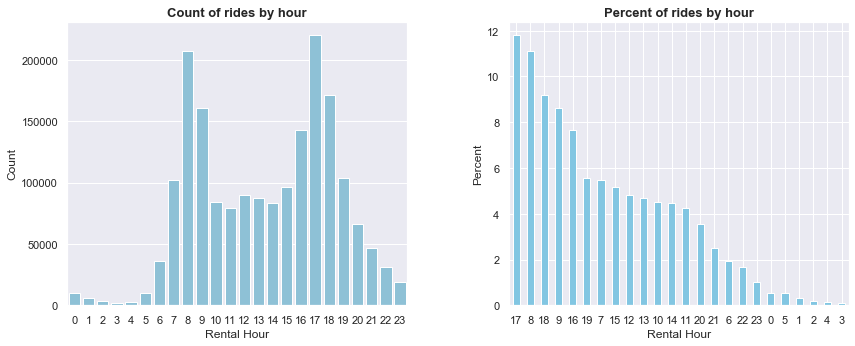

In [ ]:
#define plot size and spacing
plt.figure(figsize=(14, 12)).subplots_adjust(hspace = 0.3, wspace = 0.3)

#plot rides by month
plt.subplot(2, 2 ,1)
sns.countplot(data = bikes_clean, x = 'start_hour', color = 'c')
chart_labels('Rental Hour','Count','Count of rides by hour')

#plot proportions
plt.subplot(2, 2 ,2)
proportion(bikes_clean['start_hour']).plot(kind='bar', color = 'c')
chart_labels('Rental Hour','Percent','Percent of rides by hour')
plt.xticks(rotation = 0)
plt.show()

Distribution of the rental hours is bimodal, where the high peaks are between 8am 9am and 5pm to 6pm these times fit in with general rush hour commutes

### What gender makes most use of the bike share?

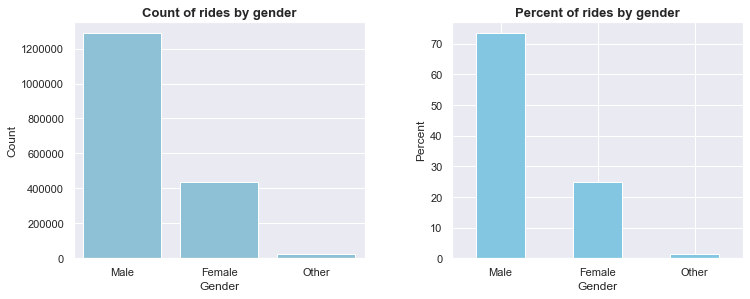

Male      73.464058
Female    24.991416
Other      1.544526
Name: member_gender, dtype: float64

In [ ]:
#define plot size and spacing
plt.figure(figsize=(12, 10)).subplots_adjust(hspace = 0.3, wspace = 0.3)

#plot counts by gender
plt.subplot(2, 2 ,1)
sns.countplot(data = bikes_clean, x='member_gender', color ='c')
chart_labels('Gender','Count','Count of rides by gender')

#plot proportions
plt.subplot(2, 2 ,2)
proportion(bikes_clean['member_gender']).plot(kind='bar', color = 'c')
chart_labels('Gender','Percent','Percent of rides by gender')
plt.xticks(rotation = 0)
plt.show()

proportion(bikes_clean['member_gender'])

We can see that more Males than Females use the bike program, but there is nor clear evidence why this is the case.
from the registered data Males account for over 70%.

### What is the most user types?

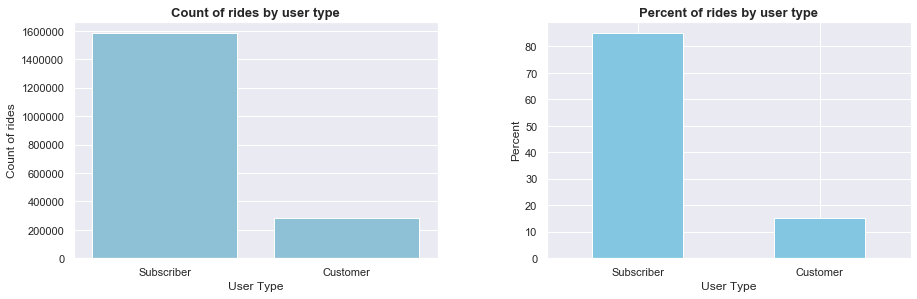

In [ ]:
#define plot size and spacing
plt.figure(figsize=(15, 10)).subplots_adjust(hspace = 0.3, wspace = 0.3)

plt.subplot(2, 2 ,1)
sns.countplot(data = bikes_clean, x='user_type', color ='c')
chart_labels('User Type','Count of rides','Count of rides by user type')

plt.subplot(2, 2 ,2)
proportion(bikes_clean['user_type']).plot(kind='bar', color = 'c')
chart_labels('User Type','Percent','Percent of rides by user type' )
plt.xticks(rotation = 0)
plt.show()

Subscribers in total make up the majority of bike usage with nearly 85%. 

### What is the distribution of duration 

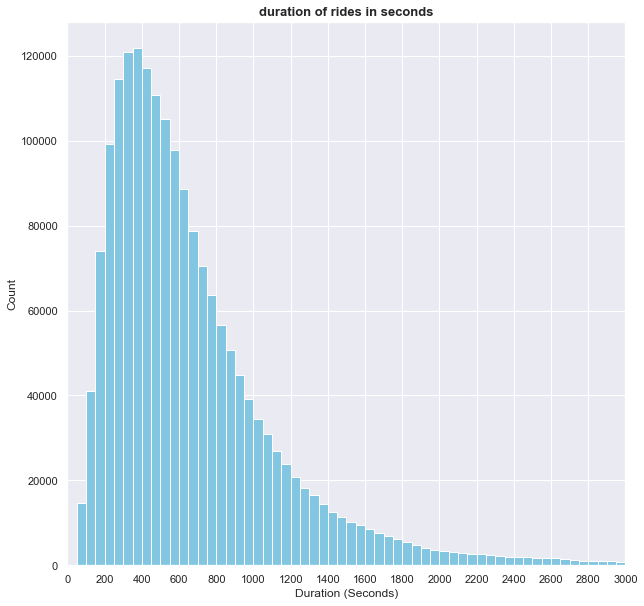

In [ ]:
#define plot size and spacing
plt.figure(figsize=(10, 10)).subplots_adjust(hspace = 0.3, wspace = 0.3)
#define bin edges
bin_edges = np.arange(0, bikes_clean['duration_sec'].max()+100, 50)
#tick ranges
ticks =  [ 0 , 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
labels = ['{}'.format(v) for v in ticks]
#plot histogram
plt.hist(data = bikes_clean, x = 'duration_sec', bins = bin_edges, color = 'c')
#set limits for plot
plt.xlim(0,3000)
#apply tick labels
plt.xticks(ticks,labels)

chart_labels('Duration (Seconds)','Count','duration of rides in seconds')
plt.show()

There are around 120000 trips with an of around 400 seconds, due to the skewed distribution lets take another look at the distribution in minutes to check for more clarity for the duration, logarithmic transformation transformation 

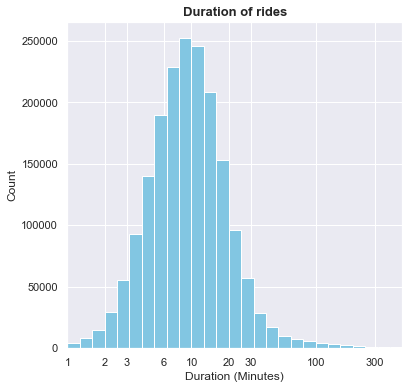

In [ ]:
#define plot size and spacing
#convert seconds to minutes
bikes_clean['duration_min'] = (bikes_clean['duration_sec'] / 60)
plt.figure(figsize=(6, 6)).subplots_adjust(hspace = 0.3, wspace = 0.3)
#convert to log scale histogram.
bin_edges = 10 ** np.arange(0, np.log10(bikes_clean.duration_min.max())+0.3, 0.1)
#plot histogram

plt.hist(bikes_clean.duration_min, bins = bin_edges, color = 'c')
# apply log scale
plt.xscale('log')
#tick ranges
tick_locs = [0,1,2,3,6,10,20, 30, 100, 300]
#apply tick ranges
plt.xticks(tick_locs, tick_locs)
#set limits for plot
plt.xlim(1,500)
chart_labels('Duration (Minutes)','Count','Duration of rides')
plt.show()

Now the distribution looks normalised after applying logarithmic transform to the data,and we can now see that the average ride is around 10min

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration was measured in seconds, this looked skewed, so want to normalise this using the logarithmic transformation, from the result we can see that with the normal distribution the duration on average is around 10 minutes.

Variables of interest was based on main on the date, and is showing what I expected to see that more bikes were rented during summer months and that there seems to be more usage during the working week Mon - Fri and less during weekends.

The time of rentals also seems to follow the daily commute cycle and has a bimodal distribution with with 2 peaks
8-9am and 5-6pm these times generaly full under the daily rush hours.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I tidied data so that member gender / and user types are as the correct data type of being catergories,

The start and end date/time was of incorrect data type and this needed to be corrected, from this i was able to create additional variables for month / week / day / and day of week, this slicing of the origanl data was critical for finding if there are seasonal or daily rental trends.

The one variable that struck out the most was the member gender with over 70% being Male,  this does not prove that the rider is Male, could just the member registration and that other members of the family use the same account.


## Bivariate Exploration

We have now seen that from the univariate exploraiton that summer months have the most bike usage.

### How does trip duration change each month?

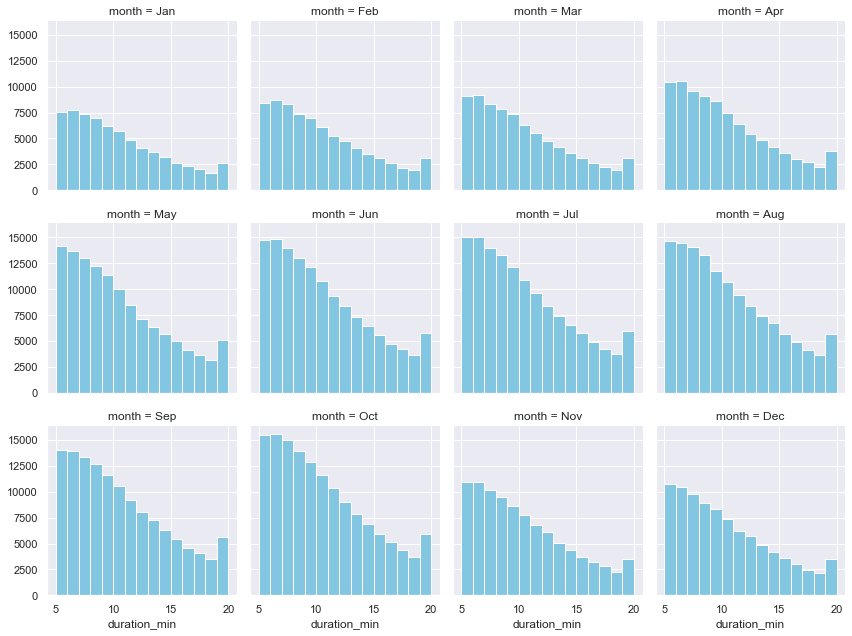

In [ ]:
group_means = bikes_clean.groupby(['month']).mean()
#group_order = group_means.sort_values(['duration_min'], ascending = False).index

month = sns.FacetGrid(data = bikes_clean, col = 'month', col_wrap = 4, height = 3)
month.map(plt.hist, 'duration_min', bins = np.arange(5, 20+1, 1), color ='c')

plt.show()

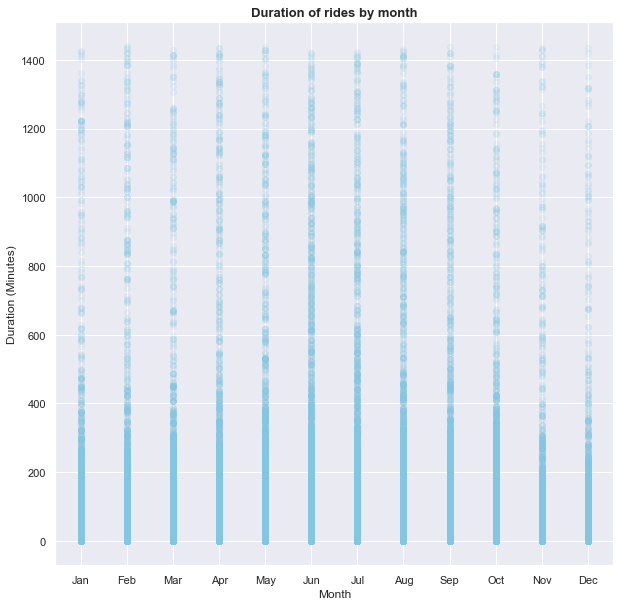

In [ ]:
#define plot size and spacing
plt.figure(figsize=(10, 10)).subplots_adjust(hspace = 0.3, wspace = 0.3)
#plot duration by month
plt.scatter(data = bikes_clean, x = 'month', y = 'duration_min', alpha = 0.1, color = 'c')
chart_labels('Month','Duration (Minutes)','Duration of rides by month')
plt.show()

we can see that there are in general long durations of bike usage during the summer months than the winters months,
this is in general what to expect. Next would be good to see the usage of Subcribers and Customers see how the trend looks there.

### how many trips per week by user type??

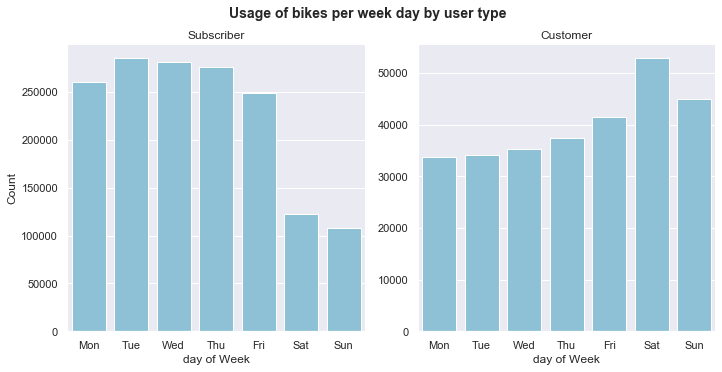

In [ ]:
#plot count bike trips by week day for each use type 
d = sns.catplot(data=bikes_clean, x='dow', col="user_type", kind='count', sharey = False, color='c', order = days)
d.set_axis_labels("day of Week", "Count")
d.set_titles("{col_name}")
d.fig.suptitle('Usage of bikes per week day by user type', y=1.03, fontsize=14, fontweight='semibold');

### How many trips per month by user type?

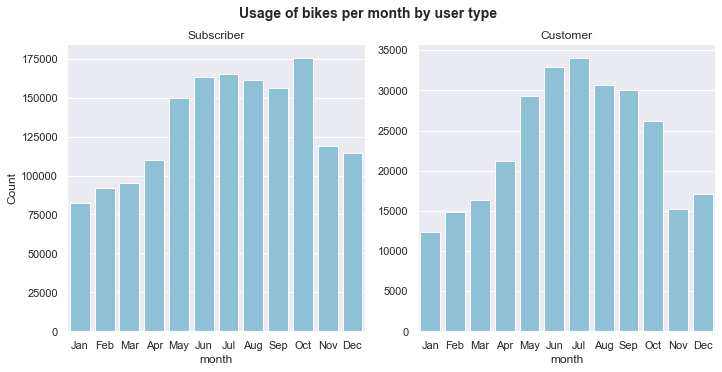

In [ ]:
#plot count starting hours for each use type 
m = sns.catplot(data=bikes_clean, x='month', col="user_type", kind='count', sharey = False, color='c')
m.set_axis_labels("month", "Count")
m.set_titles("{col_name}")
m.fig.suptitle('Usage of bikes per month by user type', y=1.03, fontsize=14, fontweight='semibold');

customers and subcribers in general tend to use the service most during the summer months, 

### What hours are most common hours of rentals by day?

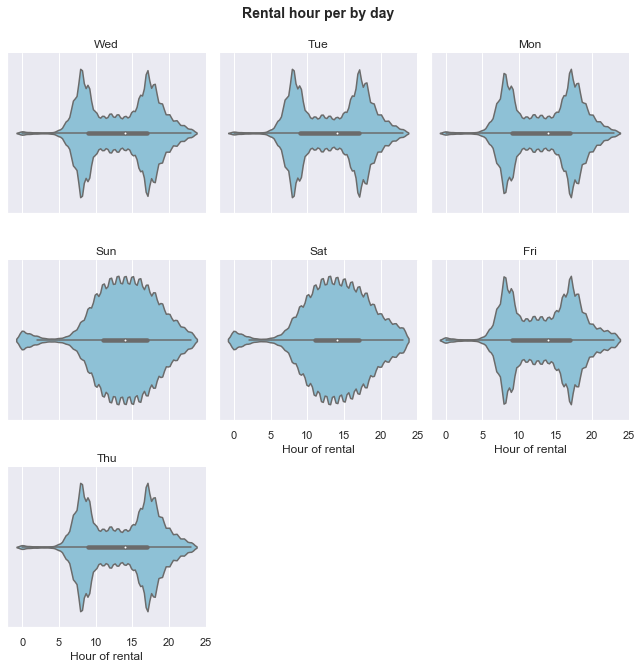

In [ ]:
#plot count starting hours for each use type 
h = sns.catplot(data=bikes_clean, x='start_hour', col="dow",kind='violin',sharey = False,
                color='c',col_wrap = 3, height = 3, order = days )
h.set_axis_labels("Hour of rental")
h.set_titles("{col_name}")
h.fig.suptitle('Rental hour per by day', y=1.03, fontsize=14, fontweight='semibold');
plt.show()

### What hours are most common between user types for bike trips?

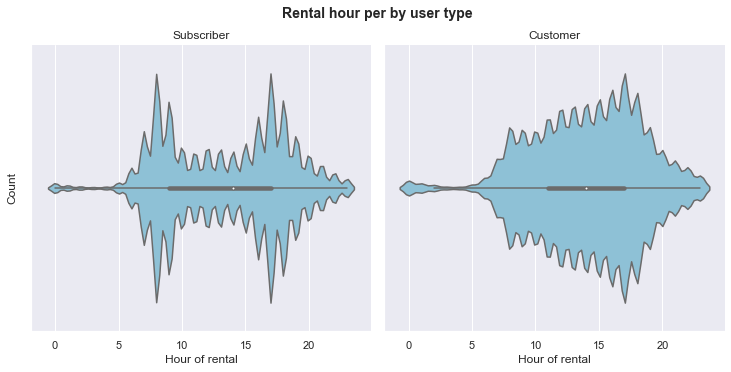

In [ ]:
#plot count starting hours for each use type 
h = sns.catplot(data=bikes_clean, x='start_hour', col="user_type",kind='violin',sharey = False, color='c')
h.set_axis_labels("Hour of rental", "Count")
h.set_titles("{col_name}")
h.fig.suptitle('Rental hour per by user type', y=1.03, fontsize=14, fontweight='semibold');
plt.show()

### What is the average trip duration for each user type?

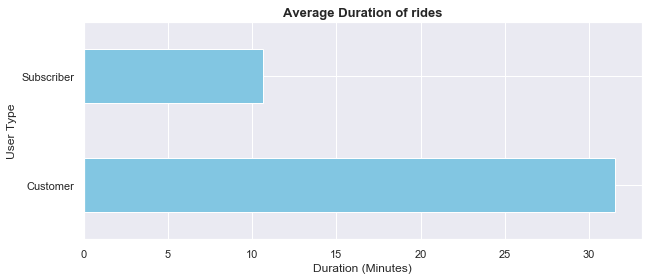

In [ ]:
plt.figure(figsize=(10, 4)).subplots_adjust(hspace = 0.3, wspace = 0.3)
#calculate mean of duration_min for each user group, and plot
duration = bikes_clean.groupby(['user_type'])['duration_min'].mean().plot(kind = 'barh', color='c')
chart_labels('Duration (Minutes)','User Type','Average Duration of rides')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
There looking at the data based on user type (subcriber of member) we can see that the still remains the strong trend with the summer months of rentals, whe we do see on week day level is that more customers use the service at weekends then weekdays compared to subscibers, this could indicate more tourist usage for this period.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Customers tend to rent late morning into the early evening, compared to subcribers where we see the peak still ate the rush hour comute times, Customer on general take longer trips with an average of 32minutes compared to the 11mins of subcribers, again this could be another indication that is tourists of more for leasure rentals.

## Multivariate Exploration

### What is the month bike usage based on customer type ?

In [ ]:
plt.figure(figsize=(15, 15)).subplots_adjust(hspace = 0.3, wspace = 0.6)
plt.subplot(2, 2 ,1)
#define pivot base on month, user type and calulate trip duration mean.
month_duration = bikes_clean.pivot_table(index='month', columns='user_type',
                                         values='duration_min', aggfunc=np.mean)

#plot month duration as heatmap
sns.heatmap(month_duration, linewidths=.1, annot=True, fmt='0.1f', cmap="GnBu", yticklabels=months)
plt.yticks(rotation=0) 
chart_labels('User Type','Month','average duration (min) by Month and User Type')


plt.subplot(2, 2 ,2)
#define pivot base on user type, and gender and calulate number of trips .
month_trip = bikes_clean.pivot_table(index='month', columns='user_type',
                                         values='bike_id', aggfunc={'bike_id':len})

#plot month duration as heatmap
sns.heatmap(month_trip,linewidths=.1,annot=True,fmt='d',cmap='GnBu',yticklabels=months)
plt.yticks(rotation=0) 
# set plot's labels
chart_labels('User Type','Month','Bike Trips by Month and User Type')
plt.show()

NameError: ignored

In [ ]:
plt.figure(figsize=(15, 15)).subplots_adjust(hspace = 0.3, wspace = 0.6)
plt.subplot(2, 2 ,1)
#define pivot base on month, user type and calulate trip duration mean.
month_duration = bikes_clean.pivot_table(index='dow', columns='user_type',
                                         values='duration_min', aggfunc=np.mean)

#plot month duration as heatmap
sns.heatmap(month_duration, linewidths=.1, annot=True, fmt='0.1f', cmap="GnBu", yticklabels=days)
plt.yticks(rotation=0) 
chart_labels('User Type','Month','average duration (min) by Month and User Type')


plt.subplot(2, 2 ,2)
#define pivot base on user type, and gender and calulate number of trips .
month_trip = bikes_clean.pivot_table(index='dow', columns='user_type',
                                         values='bike_id', aggfunc={'bike_id':len})

#plot month duration as heatmap
sns.heatmap(month_trip,linewidths=.1,annot=True,fmt='d',cmap='GnBu',yticklabels=days)
plt.yticks(rotation=0) 
# set plot's labels
chart_labels('User Type','Month','Bike Trips by Month and User Type')
plt.show()

NameError: ignored

We can see from the two heatmaps the while subsribers use the system more thier monthly average of trip durtaiton
is than customers.

In [ ]:
plt.figure(figsize=(15, 15)).subplots_adjust(hspace = 0.3, wspace = 0.6)
plt.subplot(2, 2 ,1)
#define pivot base on month, user type and calulate trip duration mean.
month_duration = bikes_clean.pivot_table(index='user_type', columns='season',
                                         values='duration_min', aggfunc=np.mean)

#plot month duration as heatmap
sns.heatmap(month_duration, linewidths=.1, annot=True, fmt='0.1f', cmap="GnBu")
plt.yticks(rotation=0) 
chart_labels('Season','user_type','average duration (min) by user type and Season')


plt.subplot(2, 2 ,2)
#define pivot base on user type, and gender and calulate number of trips .
month_trip = bikes_clean.pivot_table(index='user_type', columns='season',
                                         values='bike_id', aggfunc={'bike_id':len})

#plot month duration as heatmap
sns.heatmap(month_trip,linewidths=.1,annot=True,fmt='d',cmap='GnBu')
plt.yticks(rotation=0) 
# set plot's labels
chart_labels('Season','user_type','Bike Trips by user type and Season')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

by ploting, trip duration and user type against a time variable (month, day or seasonal). We can confirm that there is a strong relation ship of seasonal use by both subscribers and customers of the bike
service, and that customers make on average long trips.



### Were there any interesting or surprising interactions between features?

One suprise i do see is that when appears to be a drop mid week Wednesday on trips, i am just not able to explain this and would require further investigation.

### Resources

https://pbpython.com/pandas-pivot-table-explained.html
    
https://stackoverflow.com/questions/27037241/changing-the-rotation-of-tick-labels-in-seaborn-heatmap

https://seaborn.pydata.org/generated/seaborn.catplot.html
    
